In [288]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
import seaborn as sns
import math
import datetime
import pickle
import joblib

model_rfr = joblib.load('savemodel_rfr.sav')

dfmain = pd.read_csv("AIS_weather_H_ok2_copy.csv",parse_dates=["Time"])
dfmain = dfmain[dfmain['LAT'] > 55.04 ]

dfpre = pd.read_csv("AIS_weather_h_rename_copy.csv",parse_dates=["Time"])
dfpre = dfpre[dfpre['LAT'] > 55.04 ]

In [289]:
dfmain = dfmain.drop(['Wind Speed','Current Speed'],axis=1)

In [290]:
dfpre = dfpre.drop(dfpre.columns[[0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,21,22,23,26]],axis=1)
dfpre = dfpre.rename({'Eastward wind': 'eastwind', 'Northward wind': 'northwind',
                           'Eastward current': 'eastcurrent', 'Northward current': 'northcurrent',
                           'SOG':'sog','COG':'cog','Heading':'heading'},axis=1) 
dfpre.head(n=5)

,eastwind,northwind,eastcurrent,northcurrent,sog,cog
0,2.267688,6.741482,0.113690,0.044994,0.0,358.9
1,1.782681,6.410275,0.113690,0.044994,0.0,358.9
2,1.154659,6.385135,0.083984,0.054000,0.0,358.9
3,0.348801,6.094659,0.083984,0.054000,0.0,358.9
4,-0.593128,6.153186,0.083984,0.054000,0.0,358.9


In [291]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=50)
imputer.fit(dfpre)

KNNImputer(n_neighbors=50)

In [292]:
x_pre = imputer.transform(dfpre)

In [293]:
dfpre = pd.DataFrame(x_pre, columns=dfpre.columns, index=dfpre.index)

In [294]:
dfpre["Current Speed"] = np.sqrt(dfpre["eastcurrent"]**2 + dfpre["northcurrent"]**2)
dfpre["Wind Speed"] = np.sqrt(dfpre["eastwind"]**2 + dfpre["northwind"]**2)

In [295]:
dfpre.describe()

,eastwind,northwind,eastcurrent,northcurrent,sog,cog,Current Speed,Wind Speed
count,7453.000000,7453.000000,7453.000000,7453.000000,7453.000000,7453.000000,7453.000000,7453.000000
mean,1.976344,0.379926,0.019228,0.004214,8.870751,242.699284,0.096788,6.513813
std,5.296850,4.429899,0.089903,0.074041,8.619512,108.555287,0.067697,3.048934
min,-15.216397,-12.824582,-0.491010,-0.404690,-0.009130,-0.134241,0.000735,0.193221
25%,-1.756650,-2.534061,-0.021486,-0.033055,0.000000,124.116508,0.047447,4.149883
50%,2.294543,0.385690,0.025485,0.003718,6.953578,283.216008,0.079148,6.285080
75%,5.838650,3.339456,0.062644,0.039626,18.014436,346.200000,0.128444,8.525129
max,16.338177,14.519458,0.522374,0.364966,21.070514,359.728115,0.525174,16.760001


In [296]:
dfpre["True North Wind Direction"] =  180 +  np.rad2deg(np.arctan((dfpre["eastwind"])/(dfpre["northwind"])))

# dfpre["True North Wind Direction"] = np.where(dfpre["True North Wind Direction"] > 0, 180 + dfpre["True North Wind Direction"] , 180 - dfpre["True North Wind Direction"])

# if dfpre["True North Wind Direction"]<0:
#     dfpre["True North Wind Direction"] = 180 - dfpre["True North Wind Direction"]
# elif dfpre["True North Wind Direction"]>0:
#     dfpre["True North Wind Direction"] = 180 - dfpre["True North Wind Direction"]

In [297]:
dfpre["True North Current Direction"] = np.rad2deg(np.arctan(dfpre["eastcurrent"]/dfpre["northcurrent"]))

In [298]:
dfpre = dfpre.drop(['eastwind','northwind','eastcurrent','northcurrent','sog','cog'],axis=1)

In [299]:
df = pd.concat([dfmain,dfpre],axis=1)
df.head()

,Unnamed: 0,Time,LON,LAT,Temperature above oceans,Air density above oceans,Max wave height,Swell period,Wind wave period,Wave period,...,Heading,True Wind Direction,True Current Direction,True Swell Direction,True Wind Wave Direction,True Wave Direction,Current Speed,Wind Speed,True North Wind Direction,True North Current Direction
0,0,2021-01-01 00:00:00,14.689663,55.098452,277.311035,1.259323,1.893614,4.818881,3.818459,4.154329,...,174.0,155.408180,105.591753,22.854050,22.749664,22.610062,0.122270,7.112664,198.591820,68.408246
1,1,2021-01-01 01:00:00,14.689659,55.098451,277.328369,1.259985,1.752303,4.755800,3.470216,4.130580,...,174.0,158.458891,105.591753,26.122772,19.152008,22.209274,0.122270,6.653538,195.541109,68.408246
2,2,2021-01-01 02:00:00,14.689648,55.098468,277.390625,1.260244,1.619775,4.645083,3.259682,4.083755,...,174.0,163.749663,116.740448,28.498383,12.424912,20.857971,0.099846,6.488697,190.250337,57.259552
3,3,2021-01-01 03:00:00,14.689646,55.098471,277.411377,1.260148,1.518736,4.588384,3.177906,4.010502,...,174.0,170.724504,116.740448,29.956985,6.725922,18.732071,0.099846,6.104632,183.275496,57.259552
4,4,2021-01-01 04:00:00,14.689644,55.098462,277.430664,1.260634,1.455034,4.528841,3.281654,3.913362,...,174.0,179.505940,116.740448,34.486298,3.761627,15.731430,0.099846,6.181707,174.494060,57.259552


In [300]:
# SOG threshold according to Abebe
df = df[df['SOG'] > 5 ]

In [301]:
# Exclude data for the month of June to check the model's forecasting performance 

dfdate6 = df[df['Time'].dt.strftime('%Y-%m') == '2021-06']
df = df[df['Time'].dt.strftime('%Y-%m') != '2021-06']

# Extract information of a journey from a single day

koege_dep = df[df['Time'].dt.strftime('%Y-%m-%d %H:%M:%S') == '2021-05-31 23:00:00']
koege_arr = dfdate6[dfdate6['Time'].dt.strftime('%Y-%m-%d') == '2021-06-01']

# Drop the departure time for next trip

koege_arr2 = koege_arr.drop(koege_arr.index[14])

# To gain information for a single trip from Koege to Ronne

ronne_arr = koege_arr.drop(koege_arr.index[4:15])

dfday6 = pd.concat([koege_dep,koege_arr2])
dfone6 = pd.concat([koege_dep,ronne_arr])

# # For Qgis Single Journey
# dfday6.to_csv("AIS_01_06_21_koegeronne.csv")

In [302]:
dfdate6 = dfdate6.drop(['Unnamed: 0','Time','LON','LAT','Air density above oceans',
'Surface pressure','Width','Length'],axis=1)
dfdate6.head(n=5)

,Temperature above oceans,Max wave height,Swell period,Wind wave period,Wave period,Sea surface temperature,Combined wind waves and swell height,Swell height,Wind wave height,Draught,...,Heading,True Wind Direction,True Current Direction,True Swell Direction,True Wind Wave Direction,True Wave Direction,Current Speed,Wind Speed,True North Wind Direction,True North Current Direction
119,275.823975,3.358080,6.738089,4.925452,5.291555,278.661621,1.759765,0.743164,1.583740,5.281861,...,100.782313,100.989288,164.871808,15.554049,66.843493,57.268527,0.144914,10.248966,201.771601,85.654121
120,275.924011,3.578120,7.185143,5.342444,5.697814,278.936035,1.950242,0.841925,1.757568,5.289403,...,96.934816,108.737155,153.650411,11.071672,60.455881,51.313932,0.246220,11.364678,205.671971,70.585227
121,276.285034,4.184914,7.260825,5.460486,6.126474,279.209961,2.189788,0.933936,1.910706,5.288446,...,97.525758,114.910729,153.031589,16.281358,57.086511,46.894106,0.284315,12.666946,212.436488,70.557348
122,277.189484,4.908680,6.808745,6.225745,6.284671,279.216553,2.565230,0.723303,2.452637,5.290781,...,106.941521,123.568984,153.643227,69.175152,55.507286,56.527939,0.300428,13.386999,230.510505,80.584748
126,277.408752,4.621826,6.813305,5.970984,6.291378,279.319824,2.414834,1.022894,2.130981,4.842367,...,227.680837,26.476633,41.766758,158.632374,159.050718,167.192888,0.262897,12.053293,254.157471,89.447596


In [303]:
dfdate6= dfdate6.rename({'Max wave height': 'waveheight', 'Draught': 'draught',
                           'SOG': 'sog', 'Wind Speed': 'windspeed', 
                           'True Wind Direction': 'truewinddir','Temperature above oceans' : 'oceantemperature',
                           'COG': 'cog', 'Current Speed' : 'curspeed','True Wave Direction' : 'truewavedir',
                            'Swell period': 'swellperiod','Wind wave period': 'windwaveperiod','Sea surface temperature': 'surftemp',
                            'Combined wind waves and swell height': 'windwaveswellheight','Swell height': 'swellheight','Wind wave height': 'windwaveheight',
                            'Heading': 'heading','True Current Direction': 'truecurrentdir','True Swell Direction': 'trueswelldir',
                            'True Wind Wave Direction': 'truewindwavedir','Wave period': 'waveperiod',
                            'True North Wind Direction' : 'truenorthwinddir' , 'True North Current Direction' : 'truenorthcurrentdir'
                           }, axis=1) 

In [304]:
# Rearrange column to match model 

dfdate6 = dfdate6[['oceantemperature','waveheight','swellperiod','windwaveperiod','waveperiod','surftemp','windwaveswellheight','swellheight','windwaveheight','draught','sog','cog','heading','windspeed','curspeed','truewinddir','truecurrentdir','trueswelldir','truewindwavedir','truewavedir', 'truenorthwinddir' , 'truenorthcurrentdir']]

In [305]:
stats2 = dfdate6['curspeed'].value_counts()

In [306]:
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=50)


In [307]:
imputer.fit(dfdate6)

KNNImputer(n_neighbors=50)

In [308]:
xdate = imputer.transform(dfdate6)

In [309]:
dfdate6tr = pd.DataFrame(xdate, columns=dfdate6.columns, index=dfdate6.index)

In [310]:
x_date = dfdate6tr.drop(['sog','truenorthcurrentdir','truenorthwinddir'],axis=1)
y_date = dfdate6tr.sog

In [311]:
def predict_y(x_test,model_type):
    y_predicted = model_type.predict(x_test)
    return y_predicted

def display_scores(x_test,y_test,model_type):
    from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,median_absolute_error
    print("R^2 score (Indicate model fit. Best Score = 1):", model_type.score(x_test,y_test))
    print("Explained Variance EV (Indicate amount of variance in model. Best Score = 1):", explained_variance_score(y_test,y_predicted))
    print("Mean Absolute Error MAE (Indicate how much error a model makes in its prediction. Best Score = 0):", mean_absolute_error(y_test,y_predicted))
    print("Root Mean Square Error RMSE (Same as MAE, more sensitive to outlier. Best Score = 0):", mean_squared_error(y_test,y_predicted))
    print("Median Absolute Error MAD (Check robustness against outlier. Best Score = 1):", median_absolute_error(y_test,y_predicted))

y_predicted = predict_y(x_date,model_rfr)
display_scores(x_date,y_date,model_rfr)

R^2 score (Indicate model fit. Best Score = 1): 0.865191064607542
Explained Variance EV (Indicate amount of variance in model. Best Score = 1): 0.8851293421047093
Mean Absolute Error MAE (Indicate how much error a model makes in its prediction. Best Score = 0): 0.8192039318192239
Root Mean Square Error RMSE (Same as MAE, more sensitive to outlier. Best Score = 0): 1.2665686726538057
Median Absolute Error MAD (Check robustness against outlier. Best Score = 1): 0.5814641679499957


In [312]:
ydate_pred = y_predicted
dfprog_sog = pd.Series(y_date,name="sog_act").to_frame()
dfprog_sog["sog_pred"] = ydate_pred
dfprog_sog["gamma"] = dfdate6tr["truenorthcurrentdir"]
dfprog_sog["nwinddir"] = dfdate6tr["truenorthwinddir"]

print(dfprog_sog)

        sog_act   sog_pred      gamma    nwinddir
119   18.998906  18.532150  85.654121  201.771601
120   19.334278  18.507278  70.585227  205.671971
121   18.911047  18.629329  70.557348  212.436488
122   13.854933  13.987405  80.584748  230.510505
126    9.305198  10.829396  89.447596  254.157471
...         ...        ...        ...         ...
7413  19.072622  18.308065 -75.033834  110.959927
7414  17.696584  17.661892  86.330174  126.837339
7415  15.963630  16.482205  83.486098  119.018621
7418   8.988086   8.532128  89.745593  140.723377
7419  17.672769  17.371359  15.792214  143.902554

[322 rows x 4 columns]


In [313]:
dfprog = pd.concat([x_date,dfprog_sog],axis=1)
dfprog.head(n=10)

,oceantemperature,waveheight,swellperiod,windwaveperiod,waveperiod,surftemp,windwaveswellheight,swellheight,windwaveheight,draught,...,curspeed,truewinddir,truecurrentdir,trueswelldir,truewindwavedir,truewavedir,sog_act,sog_pred,gamma,nwinddir
119,275.823975,3.358080,6.738089,4.925452,5.291555,278.661621,1.759765,0.743164,1.583740,5.281861,...,0.144914,100.989288,164.871808,15.554049,66.843493,57.268527,18.998906,18.532150,85.654121,201.771601
120,275.924011,3.578120,7.185143,5.342444,5.697814,278.936035,1.950242,0.841925,1.757568,5.289403,...,0.246220,108.737155,153.650411,11.071672,60.455881,51.313932,19.334278,18.507278,70.585227,205.671971
121,276.285034,4.184914,7.260825,5.460486,6.126474,279.209961,2.189788,0.933936,1.910706,5.288446,...,0.284315,114.910729,153.031589,16.281358,57.086511,46.894106,18.911047,18.629329,70.557348,212.436488
122,277.189484,4.908680,6.808745,6.225745,6.284671,279.216553,2.565230,0.723303,2.452637,5.290781,...,0.300428,123.568984,153.643227,69.175152,55.507286,56.527939,13.854933,13.987405,80.584748,230.510505
126,277.408752,4.621826,6.813305,5.970984,6.291378,279.319824,2.414834,1.022894,2.130981,4.842367,...,0.262897,26.476633,41.766758,158.632374,159.050718,167.192888,9.305198,10.829396,89.447596,254.157471
127,277.399658,3.852527,6.907508,5.299354,6.061778,279.230591,2.021695,1.143225,1.607422,4.841530,...,0.181460,49.650197,36.203894,98.603207,126.285782,119.939682,20.935741,17.424789,85.735437,252.289134
128,275.499359,3.304548,6.816074,4.561194,5.927387,286.720950,1.754722,1.136414,1.240662,4.852890,...,0.281402,11.124505,16.745666,170.252415,173.337517,176.253205,12.419853,12.235935,87.870444,240.000273
130,276.370789,2.999140,6.680770,3.821632,5.959699,286.334238,1.585114,1.306714,0.837463,4.923635,...,0.185268,121.750507,148.640604,55.948144,59.314576,54.778275,20.447721,16.448165,-84.704755,248.405148
131,277.268555,3.283719,6.891045,4.686806,5.876345,279.216553,1.731217,1.167188,1.231018,4.925344,...,0.133047,156.811217,154.901600,57.732440,24.484072,41.385363,18.702889,16.465161,82.800757,264.710374
134,277.220703,2.827531,6.624643,4.262856,5.585643,279.216553,1.490863,1.038464,1.032349,5.202804,...,0.139192,1.584058,10.961510,144.135380,178.761731,159.775304,16.155258,16.377091,-78.378834,269.075598


In [314]:
# Conversion of predicted SOG to m/s

dfprog["vgms"] = dfprog["sog_pred"]/1.9438

# Conversion of actual SOG to m/s

dfprog["vgms_act"] = dfprog["sog_act"]/1.9438

In [315]:
# Conversion of the angles to radian

rad_gamma = np.deg2rad(dfprog["gamma"])
rad_cog = np.deg2rad(dfprog["cog"])

In [316]:
# Calculation of the predicted x-component of SOG

dfprog["vgx"] = dfprog["vgms"] * np.sin(rad_cog)
dfprog["vcx"] = dfprog["curspeed"] * np.sin(rad_gamma)
dfprog["stw_x"] = (dfprog["vgx"] - dfprog["vcx"])

# Calculation of the actual x-component of SOG

dfprog["vgx_act"] = dfprog["vgms_act"] * np.sin(rad_cog)
dfprog["stw_x_act"] = (dfprog["vgx_act"] - dfprog["vcx"])


In [317]:
# Calculation of the predicted y-component of SOG 

dfprog["vgy"] = dfprog["vgms"] * np.cos(rad_cog)
dfprog["vcy"] = dfprog["curspeed"] * np.cos(rad_gamma)
dfprog["stw_y"] = (dfprog["vgy"] - dfprog["vcy"])

# Calculation of the actual y-component of SOG

dfprog["vgy_act"] = dfprog["vgms_act"] * np.cos(rad_cog)
dfprog["stw_y_act"] = (dfprog["vgy_act"] - dfprog["vcy"])


In [318]:
# For the actual data
dfprog["vwms_a"] = np.sqrt(dfprog["stw_x_act"]**2 + dfprog["stw_y_act"]**2)
dfprog["stw_act"] = dfprog["vwms_a"]*1.9438

# For the prediction

dfprog["vwms_p"] = np.sqrt(dfprog["stw_x"]**2 + dfprog["stw_y"]**2)
dfprog["stw_pred"] = dfprog["vwms_p"]*1.9438



In [319]:
dfprog = dfprog.drop(['vgms','vgx','vcx','stw_x',
                      'vgy','vcy','stw_y',
                      'vgms_act','vgx_act','stw_x_act',
                      'vgy_act','stw_y_act',
                      'vwms_p','vwms_a'],axis=1)
#df_ship.head(n=5)
dfprog.head(n=10)

,oceantemperature,waveheight,swellperiod,windwaveperiod,waveperiod,surftemp,windwaveswellheight,swellheight,windwaveheight,draught,...,truecurrentdir,trueswelldir,truewindwavedir,truewavedir,sog_act,sog_pred,gamma,nwinddir,stw_act,stw_pred
119,275.823975,3.358080,6.738089,4.925452,5.291555,278.661621,1.759765,0.743164,1.583740,5.281861,...,164.871808,15.554049,66.843493,57.268527,18.998906,18.532150,85.654121,201.771601,18.729972,18.263222
120,275.924011,3.578120,7.185143,5.342444,5.697814,278.936035,1.950242,0.841925,1.757568,5.289403,...,153.650411,11.071672,60.455881,51.313932,19.334278,18.507278,70.585227,205.671971,18.913459,18.086519
121,276.285034,4.184914,7.260825,5.460486,6.126474,279.209961,2.189788,0.933936,1.910706,5.288446,...,153.031589,16.281358,57.086511,46.894106,18.911047,18.629329,70.557348,212.436488,18.429833,18.148146
122,277.189484,4.908680,6.808745,6.225745,6.284671,279.216553,2.565230,0.723303,2.452637,5.290781,...,153.643227,69.175152,55.507286,56.527939,13.854933,13.987405,80.584748,230.510505,13.276732,13.409203
126,277.408752,4.621826,6.813305,5.970984,6.291378,279.319824,2.414834,1.022894,2.130981,4.842367,...,41.766758,158.632374,159.050718,167.192888,9.305198,10.829396,89.447596,254.157471,9.009772,10.532619
127,277.399658,3.852527,6.907508,5.299354,6.061778,279.230591,2.021695,1.143225,1.607422,4.841530,...,36.203894,98.603207,126.285782,119.939682,20.935741,17.424789,85.735437,252.289134,21.221281,17.710532
128,275.499359,3.304548,6.816074,4.561194,5.927387,286.720950,1.754722,1.136414,1.240662,4.852890,...,16.745666,170.252415,173.337517,176.253205,12.419853,12.235935,87.870444,240.000273,12.753846,12.570038
130,276.370789,2.999140,6.680770,3.821632,5.959699,286.334238,1.585114,1.306714,0.837463,4.923635,...,148.640604,55.948144,59.314576,54.778275,20.447721,16.448165,-84.704755,248.405148,20.747280,16.747957
131,277.268555,3.283719,6.891045,4.686806,5.876345,279.216553,1.731217,1.167188,1.231018,4.925344,...,154.901600,57.732440,24.484072,41.385363,18.702889,16.465161,82.800757,264.710374,18.470818,16.233139
134,277.220703,2.827531,6.624643,4.262856,5.585643,279.216553,1.490863,1.038464,1.032349,5.202804,...,10.961510,144.135380,178.761731,159.775304,16.155258,16.377091,-78.378834,269.075598,15.886581,16.108414


In [320]:
dfprog.describe()

,oceantemperature,waveheight,swellperiod,windwaveperiod,waveperiod,surftemp,windwaveswellheight,swellheight,windwaveheight,draught,...,truecurrentdir,trueswelldir,truewindwavedir,truewavedir,sog_act,sog_pred,gamma,nwinddir,stw_act,stw_pred
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,3.220000e+02,322.000000,...,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,287.133146,1.236676,3.727519,3.215804,3.393579,287.275811,0.655332,0.327456,5.025946e-01,5.282713,...,86.811052,91.803223,91.901505,96.133203,17.449699,17.016888,-11.849461,179.967365,17.440998,17.008200
std,6.306975,1.056982,1.142280,0.965237,0.964939,4.798696,0.542441,0.191069,5.562786e-01,0.162420,...,59.359251,60.589723,56.981250,61.547388,3.069944,2.767432,55.353826,63.036318,3.059230,2.748312
min,269.606903,0.123628,1.915932,1.570717,1.915993,275.485352,0.073242,0.073242,2.530000e-16,4.754639,...,1.295289,0.118457,0.113800,0.200645,5.224523,5.296896,-89.500098,90.107133,5.211211,5.331544
25%,285.292786,0.488767,2.886734,2.440019,2.692099,286.816543,0.272528,0.211311,1.016693e-01,5.199718,...,28.600108,31.870529,44.310938,35.663590,16.568861,16.676327,-60.671287,119.047681,16.581974,16.617290
50%,289.505615,0.860782,3.498229,3.098701,3.162097,289.004578,0.465021,0.277676,3.230896e-01,5.290842,...,79.271353,94.793680,90.061893,103.381967,18.413643,18.053792,-26.065061,170.499216,18.399973,18.002790
75%,291.391602,1.456975,4.301386,3.864905,3.734216,290.458008,0.769191,0.388116,6.242180e-01,5.381292,...,146.039105,148.829121,147.109277,158.470366,19.421633,18.578203,35.032562,244.414903,19.417551,18.589322
max,294.685303,4.908680,7.260825,6.225745,6.291378,292.665649,2.565230,1.306714,2.452637e+00,5.657671,...,179.405213,179.955359,179.922282,179.699225,21.031230,19.895110,89.975398,269.737370,21.221281,19.963555


In [321]:
# FOC in T/d
dfprog["foc_act"] = ((dfprog["stw_act"]/17.7)**3) * 21.14112
dfprog["foc_pred"] = ((dfprog["stw_pred"]/17.7)**3) * 21.14112


In [322]:
dfprog.head(n=10)

,oceantemperature,waveheight,swellperiod,windwaveperiod,waveperiod,surftemp,windwaveswellheight,swellheight,windwaveheight,draught,...,truewindwavedir,truewavedir,sog_act,sog_pred,gamma,nwinddir,stw_act,stw_pred,foc_pred,foc_act
119,275.823975,3.358080,6.738089,4.925452,5.291555,278.661621,1.759765,0.743164,1.583740,5.281861,...,66.843493,57.268527,18.998906,18.532150,85.654121,201.771601,18.729972,18.263222,23.224179,25.050684
120,275.924011,3.578120,7.185143,5.342444,5.697814,278.936035,1.950242,0.841925,1.757568,5.289403,...,60.455881,51.313932,19.334278,18.507278,70.585227,205.671971,18.913459,18.086519,22.556577,25.794140
121,276.285034,4.184914,7.260825,5.460486,6.126474,279.209961,2.189788,0.933936,1.910706,5.288446,...,57.086511,46.894106,18.911047,18.629329,70.557348,212.436488,18.429833,18.148146,22.787934,23.865601
122,277.189484,4.908680,6.808745,6.225745,6.284671,279.216553,2.565230,0.723303,2.452637,5.290781,...,55.507286,56.527939,13.854933,13.987405,80.584748,230.510505,13.276732,13.409203,9.192149,8.922402
126,277.408752,4.621826,6.813305,5.970984,6.291378,279.319824,2.414834,1.022894,2.130981,4.842367,...,159.050718,167.192888,9.305198,10.829396,89.447596,254.157471,9.009772,10.532619,4.454688,2.788365
127,277.399658,3.852527,6.907508,5.299354,6.061778,279.230591,2.021695,1.143225,1.607422,4.841530,...,126.285782,119.939682,20.935741,17.424789,85.735437,252.289134,21.221281,17.710532,21.178882,36.435353
128,275.499359,3.304548,6.816074,4.561194,5.927387,286.720950,1.754722,1.136414,1.240662,4.852890,...,173.337517,176.253205,12.419853,12.235935,87.870444,240.000273,12.753846,12.570038,7.572129,7.909183
130,276.370789,2.999140,6.680770,3.821632,5.959699,286.334238,1.585114,1.306714,0.837463,4.923635,...,59.314576,54.778275,20.447721,16.448165,-84.704755,248.405148,20.747280,16.747957,17.909924,34.048008
131,277.268555,3.283719,6.891045,4.686806,5.876345,279.216553,1.731217,1.167188,1.231018,4.925344,...,24.484072,41.385363,18.702889,16.465161,82.800757,264.710374,18.470818,16.233139,16.308563,24.025177
134,277.220703,2.827531,6.624643,4.262856,5.585643,279.216553,1.490863,1.038464,1.032349,5.202804,...,178.761731,159.775304,16.155258,16.377091,-78.378834,269.075598,15.886581,16.108414,15.935530,15.286199


In [323]:
df_foc=dfprog.drop(['oceantemperature','waveheight','swellperiod','windwaveperiod','waveperiod',
                    'surftemp','windwaveswellheight','swellheight','windwaveheight','swellheight',
                    'windwaveheight','draught','cog','heading','windspeed','curspeed','truewinddir','truecurrentdir','trueswelldir','truewindwavedir',
                    'truewavedir','gamma','nwinddir'],axis=1)

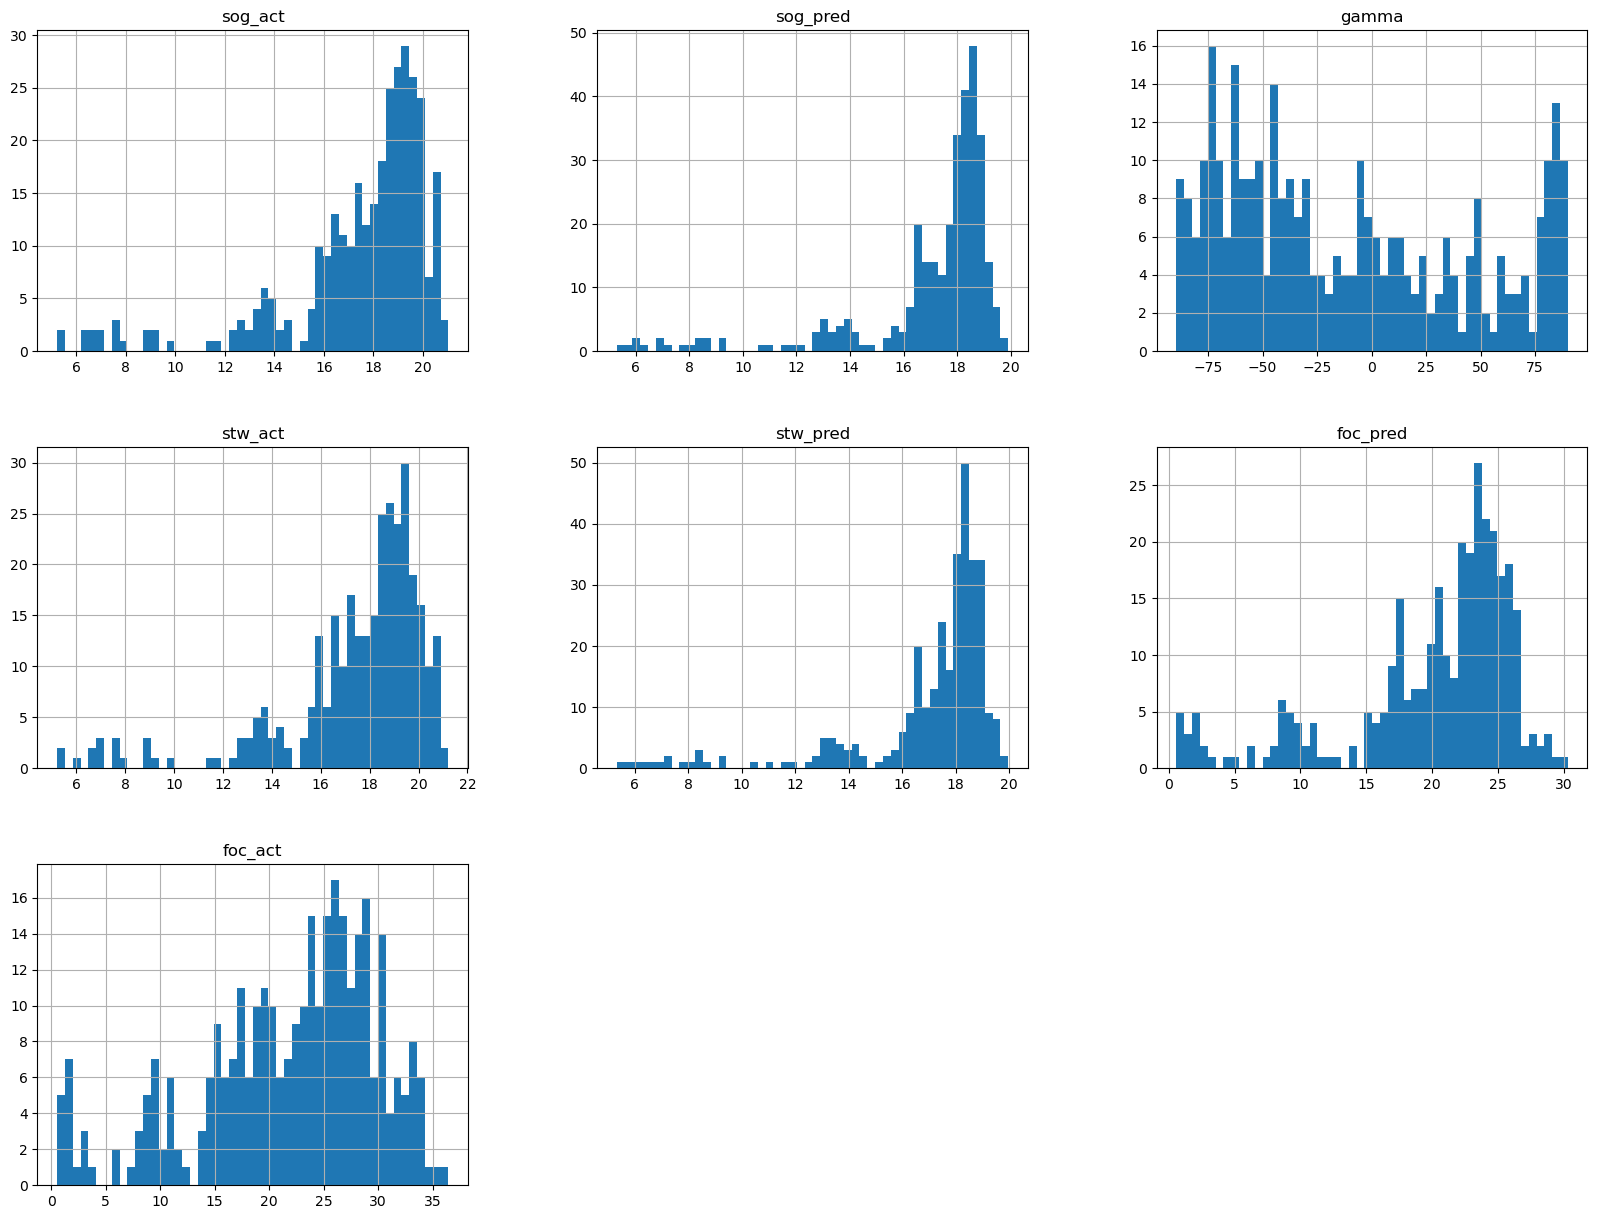

In [324]:
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
df_foc.hist(bins=50,figsize=(20,15))
plt.show()

In [325]:
foc_month = dfprog['foc_pred'].mean()
foc_month_a = dfprog['foc_act'].mean()
print(f"Mean of predicted FOC in a month is {foc_month} T//d")
print(f"Mean of actual FOC in a month is {foc_month_a} T//d")

Mean of predicted FOC in a month is 20.036802497258034 T//d
Mean of actual FOC in a month is 21.87772146283159 T//d
